# Predicting a Song's Popularity
**Fall 2025 Data Science Project**

Jordan Namie, Dean Dwiggins, Klint Faber, Meron Abera


**Contributions**


*   **Project Idea** looked through available datasets and coordinated with the team to pick a topic.
    * Jordan, Dean, Klint, Meron
*   **Dataset curation and Preprocessing** reviewing the general features of the selected dataset and making sure each of them is in a format that is usable and consistent. Null values were also taken care of at this stage
    * Jordan  
* **Data Exploration and Summary Statistics** The summary statistics give us a general overview of the dataset and provide a general path forward for the rest of the analysis. The data exploration tries to take a closer look at some of the features and understand how they may have impacted the streams of the songs we analyze
  * Meron -- One Way ANOVA
  * Dean  -- Correlation, Pearsons Coefficent
  * Klint -- Man-Whitney U
* **ML Algorithm Design/Development** After completing our data exploration, it is not the job to determine what kind of ML algorithm we should use to capture the variances and features in our data.
  * Jordan, Meron, Dean, Klint
* **ML Algorithm Training and Test Data Analysis** Now that the type of analysis has been decided, the next step is to split our data into training and test sets, to actually create and train the model, and analyze its accuracy
  * Jordan, Klint
* **Visualization, Result Analysis, Conclusion** Now that we have finished training the model and analyzed its accuracy, we visualize the results to see how well it works, and draw any conclusions we can about what we have learned and the success of the model
  * Dean
* **Final Tutorial Report Creation** development of this tutorial that describes the process of developing an ML model from start to finish
  * Jordan, Klint

# Introduction

As a team, the first step to developing an ML model is to identify a question that you want to answer. We chose to investigate the relationship between some of the most popular songs and their characteristics. We ask:


*  Is there a correlation between the speed (BPM) of a song and the number of times it is streamed
*  Does the month a song is released impact its popularity
* Are there relationships between a song's key and its streams?

Answering these questions can help future music producers understand what features might help their songs gain more popularity.

# Data curation

The next step in the data science life cycle is the collection of relevant data to answer the identified question.

To find datasets that could help us answer this question we used the [Kaggle](https://www.kaggle.com/) database. Through our search we were able to find this dataset:
* [Top Spotify Songs 2023](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)

We deicded to use this dataset because not only does it list the top songs of 2023, but it also includes key features like the date of release, BPM of each song, a dancibility score, the key which the song is in, and how many playlists the song is in. We belived these features allowed pelntly of space to idnetify trends among the songs.

To download the dataset, navigate to the download button and select download as zip. Make sure the file is stored in the same location as the project you are working on so it can be accessed later.

For the extent of this project, we will use the [Pandas library](https://pandas.pydata.org/docs/index.html). Pandas is an easy-to-use library integrated with Python coding to help manipulate and understand data.

In [ ]:
import pandas as pd

We will read in to data that we downloaded from the CSV file into the pandas object ```songs_df```

we then display some general infomration about the data we imported using the ```.info()``` function. This will tell use the shape of the data frame as well as all the columns/features that exist within it.

In [ ]:
songs_df = pd.read_csv('spotify-2023.csv', encoding='latin-1')
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

By displaying the information, we see that our dataset has 24 columns and 953 rows. There are some null values in some of the columns. Specifically, there are null values in the `in_shazam_charts`, and `key` columns.

Another way to help you understand the data you imported is to examine a small slice of the dataframe. This can be done by using the ```.head()``` function. If there is no argument within the parentheses, it will show us the first five rows of the data. If you add a numerical argument inside the parentheses, you will see many rows of data.


In [ ]:
songs_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


We then converted some of the columns to numbers, and coerced any errors during conversion.

We added a `date` column combining the separate `released_year`,`released_month` and `released_day` columns into a datetime object.

We also added a `in_playlists` column combining the seperate `in_spotify_playlists`,`in_apple_playlists` and `in_deezer_playlists` columns into a single column that is the sum of all of the values.

We did the same for the `in_chrats` column combining the seperate `in_spotify_charts`,`in_apple_charts`, and `in_deezer_charts`  columns. We choose to ignore and drop the `in_shazam_charts` column as it has missing data for 50 of the entires.

In [ ]:
# converting the given feature into a numeric value
songs_df['streams'] = pd.to_numeric(songs_df['streams'], errors='coerce')
songs_df['in_apple_playlists'] = pd.to_numeric(songs_df['in_apple_playlists'], errors='coerce')
songs_df['in_deezer_playlists'] = pd.to_numeric(songs_df['in_deezer_playlists'], errors='coerce')

# dropping the shazam_charts column
songs_df = songs_df.drop(['in_shazam_charts'],axis=1)

# creating a new date column using the month, day, and year values
songs_df['date'] = pd.to_datetime(
    {
        "year": songs_df["released_year"],
        "month": songs_df["released_month"],
        "day": songs_df["released_day"]
    }, yearfirst=True, errors='coerce')
# removing the individual month day and year columns
songs_df = songs_df.drop(['released_year','released_month','released_day'], axis=1)

#creating new columns for number of playsits a song is in and the number of charts it is on
# this will combine the columns with individual stremaing platform data
playlist_cols = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']
chart_cols = ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']

songs_df['in_playlists'] = songs_df[playlist_cols].sum(axis=1)
songs_df['chart_rank'] = songs_df[chart_cols].mean(axis=1)

# removing the individual playlist and charts columns
songs_df = songs_df.drop(columns=playlist_cols + chart_cols)

Next, we looked at any NA values we could account for. There was only one song with an NA value for their streaming number, so we decided to just remove that song.


In [ ]:
# Check for any na values, drop if less than 1% of data
rows_nan = songs_df[songs_df.isna().any(axis=1)]
nan_counts = songs_df.isna().sum()

print("Number rows with na: ", len(rows_nan))
display(nan_counts)

# Only 1 missing value in streams, just drop row (1 = .1 % of data)
songs_df = songs_df.dropna(subset = ['streams'])

# We will also not consider Key, so we will drop this column as it has NA values
songs_df = songs_df.drop(['key'],axis=1)

Number rows with na:  96


,0
track_name,0
artist(s)_name,0
artist_count,0
streams,1
bpm,0
key,95
mode,0
danceability_%,0
valence_%,0
energy_%,0


In [ ]:
print(songs_df.columns.tolist())

['track_name', 'artist(s)_name', 'artist_count', 'streams', 'bpm', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'date', 'in_playlists', 'chart_rank']


# Exploratory Data Analysis

Now that our data is prepared for analysis, we can examine the summary statistics and perform some data exploration to identify significant relationships.

Key steps:

* Summary statistics: Explore and describe basic dataset patterns

* Correlation (Playlists vs. streams): Test linear relationship using Pearson correlation

* ANOVA (streams by release month): Compare average streams across months

* Kruskal-Wallis (Tempo Group and Streams): Compare song BPM with streams

**NOTE** for each of the satistical tests we will use $\alpha = 0.05$


For these analyses we will need the help of these additional libraries:

* [SciPy](https://docs.scipy.org/doc/scipy/reference/stats.html)
  * Provides the statistical functions necessary to conduct the analysis
* [MapPlotLib](https://matplotlib.org/stable/users/explain/quick_start.html)
  * Allows us to create visualizations to help identify and understand patterns in the results
* [Seaborn](https://seaborn.pydata.org/)
    * Another data visualization tool

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import (mannwhitneyu, pearsonr, f_oneway, kruskal)

## Summary Statistics

We will find the summary statistics using the panda's dataframe function `.describe()`



In [ ]:
songs_df.describe()

,artist_count,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,date,in_playlists,chart_rank
count,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952,952.00000,952.000000
mean,1.556723,5.141374e+08,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655,2018-09-28 21:30:15.126050560,5371.12395,22.218137
min,1.000000,2.762000e+03,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000,1930-01-01 00:00:00,34.00000,0.000000
25%,1.000000,1.416362e+08,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000,2020-07-12 06:00:00,914.50000,3.666667
50%,1.000000,2.905309e+08,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000,2022-04-08 00:00:00,2306.00000,16.333333
75%,2.000000,6.738690e+08,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000,2022-11-04 00:00:00,5995.25000,35.416667
max,8.000000,3.703895e+09,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,2023-07-14 00:00:00,53101.00000,140.000000
std,0.893331,5.668569e+08,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399,NaN,8008.47401,22.246296


From these summary stats, we can see that most songs will typically be made by one artist. There are higher numbers for Spotify data, for example, a higher average of how many playlists a song is included in for Spotify, compared to other platforms.

Most songs tend to fall around 122BPM on average, with a standard deviation of 28 bpm. 120 is a pretty standard BPM for most songs. Energy and danceability come close with 64% and 67% averages, respectively.

Acousticness, instrumentalness, and liveness seem to have relatively low average percentages. This may indicate that most of these songs are produced electronically, but this can't be said for sure. For these analyses, we will need the help of these additional libraries:

## Correlation analysis
For the first analysis, we are analyzing if there is a correlation between the number of playlists a song is in and that song's streams.

Method: Pearson correlation

- $H_O$: There is no correlation between playlists and Streams

- $H_A$: There is a positive correlation between playlists and Streams

Visualize the data using a scatter plot that shows the relationship between the number of playlists a song is in and streams.

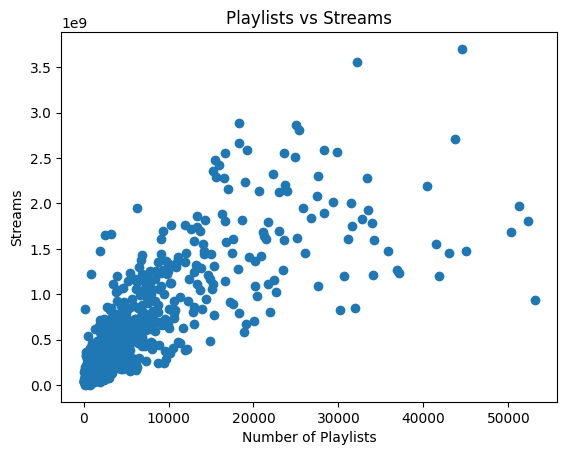

In [ ]:
plt.scatter(songs_df['in_playlists'], songs_df['streams'])
plt.title('Playlists vs Streams')
plt.xlabel('Number of Playlists')
plt.ylabel('Streams')
plt.show()

Compute the Pearson correlation coefficient and the P-value.

In [ ]:
correlation_coefficient, p_value = pearsonr(songs_df['in_playlists'], songs_df['streams'], alternative="greater")
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.7962289005222137
P-value: 7.501715422019807e-210


**Conclusions**


1.   **Visual Evidence:** The scatter plot demonstrates a clear positive linear trend between playlists and streams
2.   **Strong Correlation Coefficient:** The Pearson Correlation Coefficient of 0.796 indicates a strong positive relationship between the two variables
3. **Statistical Significance:** As the p-value is much less than 0.5, we are able to definitely reject the null hypothesis


 Based on all three of these elements, **We reject the null hypothesis** and conclude that there is a statistically significant positive correlation between the number of playlists a song is in and the number of times it is streamed.

## One Way ANOVA
For this next test we are checking if there is a difference in average streams per month.

Method: One-Way ANOVA (Hypothesis Testing)
- $H_0$: The average streams are the same across all release months
- $H_A$: The average streams differs signficantly for at least one month

Compute the P-value using an one way ANOVA test

In [ ]:
#extract month from date column
songs_df["month"] = songs_df["date"].dt.month

# Get streams for each month
months = {}
for m in range (1, 13):
  data = songs_df[songs_df["month"] == m]["streams"].values
  if len(data) > 1:
    months[m] = data

# Perform oneway ANOVA test
f, p = f_oneway(*months.values())

print("p-value: ", p)


p-value:  3.267617433013214e-07


Visualize the data as as box and whisker plots  

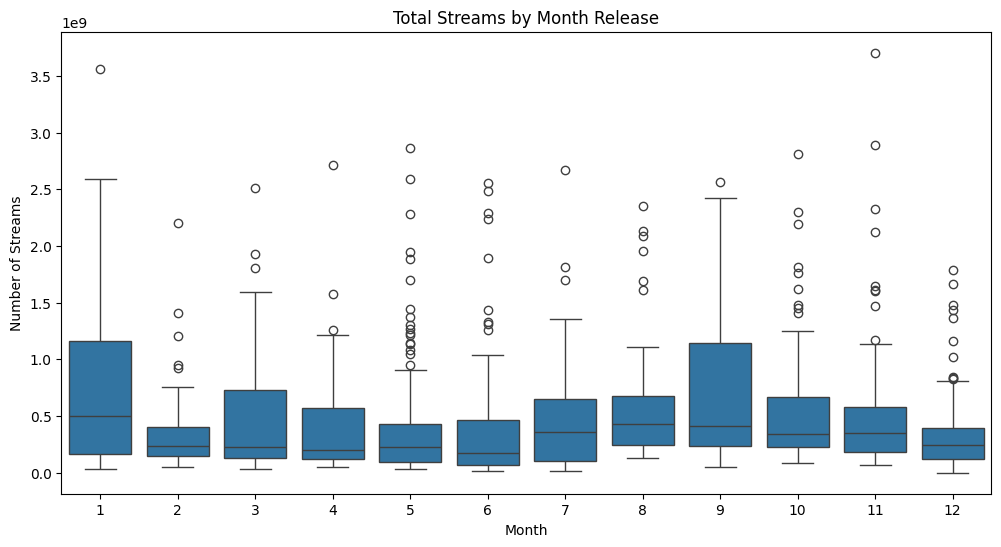

In [ ]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = "month", y = "streams", data = songs_df)
plt.title("Total Streams by Month Release")
plt.xlabel("Month")
plt.ylabel("Number of Streams")
plt.show()

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

streams = songs_df['streams']
months = songs_df['month']

tukey_results = pairwise_tukeyhsd(endog=streams, groups=months, alpha=0.05)
print(tukey_results)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
group1 group2     meandiff    p-adj       lower          upper      reject
--------------------------------------------------------------------------
     1      2 -374352634.7206 0.0009 -655439847.2483 -93265422.1929   True
     1      3  -250453528.301 0.0522 -501976683.9268   1069627.3248  False
     1      4 -323360157.1597 0.0065 -597050650.0557 -49669664.2637   True
     1      5 -311837082.4173 0.0004 -536908533.0823 -86765631.7523   True
     1      6 -317461465.8592 0.0023  -568984621.485 -65938310.2334   True
     1      7  -245329659.256 0.1514 -524858486.3509  34199167.8389  False
     1      8   -96240435.939 0.9974 -407163358.2639 214682486.3859  False
     1      9    7138216.1898    1.0 -282424092.0006 296700524.3803  False
     1     10 -138603734.8625 0.8612 -403378945.0128 126171475.2878  False
     1     11 -174913866.3048 0.5294 -432101421.1498  82273688.5402  False
     1     12 -357932745.

**Conclusions**

The One-Way ANOVA test yielded a p-value of 3.27e-07 < 0.05, meaning that we are able to reject the null hypothesis. This means that there is a statistically signficant difference in the average number of streams across at least one of the months.

After perfoming the Post-Hoc Tukey TSD Results, we find that the following month pairs have a statistically significant difference in average streams:
- Jan : Feb, Apr, May, Jun, Dec
- Feb : Sep
- Apr : Sep
- May : Sep
- Jun : Sep
- Sep : Dec

Observations:
- Certain months have higher or lower streams compared to others, which may indicate seasonal trends in song popularity
- September stands out for having the highest streams, compared to multiple other months
- January stands out for having significantly lower streams, compared to many other months.

## Mann-Whitney U-Test

For this test, we explore whether the speechiness of a song is related to the number or streams.

- $H_0$: There is no difference in the distribution of streams between songs with low speechiness and high speechiness

- $H_A$ : The distribution of streams is different for songs with low speechiness and high speechiness

To apply this test, we need to group the speechiness_% into high or low speechiness. Before grouping, we observe the skew of data:

In [ ]:
speechiness_skew = songs_df['speechiness_%'].skew()
print("Speechiness skew:", speechiness_skew)

1.9333565259038012


A skew value of 1.93 indicates a highly skewed data, so we split the data into two groups using the median.

Then we apply the mann-whitney U-test to the groups, and observe the p-value

Danceability vs Streams Kruskal–Wallis p-value: 0.028544453582206402


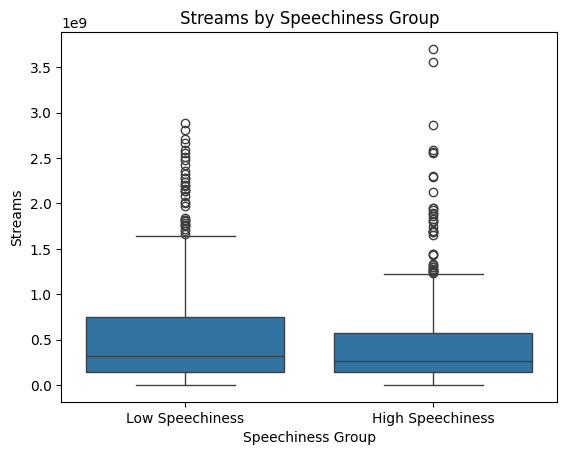

In [ ]:
from scipy.stats import mannwhitneyu
import numpy as np

speechiness_median = songs_df['speechiness_%'].median()

low_speechiness = songs_df[songs_df['speechiness_%'] <= speechiness_median]['streams']
high_speechiness = songs_df[songs_df['speechiness_%'] > speechiness_median]['streams']

stat, p = mannwhitneyu(low_speechiness, high_speechiness, alternative='two-sided')
print("Danceability vs Streams Kruskal–Wallis p-value:", p)

plt.figure()
sns.boxplot(x=['Low Speechiness']*len(low_speechiness) + ['High Speechiness']*len(high_speechiness),
            y=list(low_speechiness) + list(high_speechiness))
plt.title('Streams by Speechiness Group')
plt.ylabel('Streams')
plt.xlabel('Speechiness Group')
plt.show()

**Conclusions**
We observe a p-value of 0.0285 < 0.05, allowing us to reject the null hypothesis. This indicates that there is a statistically significant distribution of stream between songs with higher spechiness and lower spechiness.

# Primary Analysis

We decided to frame our question as a classification task. To achieve this result, we will use a **logistic regression model**

**Popularity Classification:** chart_rank < 75 with streams in the top 25% of all data

We will evaluate the model based on accuracy, precision, and recall.

from sklearn, we will import


*   [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    * used to divide the data into training and testing sets
*   [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
    * used to create the model
*   [evaluation metrics](https://scikit-learn.org/stable/api/sklearn.metrics.html#module-sklearn.metrics)
    * used to evaluate the model
*   [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
    *   used to define feature importance
*   [make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)
    *   Used to make pipeline that scales data and then trains model
*   [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
    *   Used to scale data before inputting to model
*   [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
    *   Used to encode categorical data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

First, we want to determine what features are the most important in popularity. To do this, we will use `RandomForestClassifier`'s `feature_importances_` attribute.

In [ ]:
# making a copy of the data so changes here won't affect the original data
model_df = songs_df.copy()

model_df["streams"] = pd.to_numeric(
    model_df["streams"].astype(str).str.replace(",", "", regex=False),
    errors="coerce"
).fillna(0).astype(int)

# Label-encoding categorical data (mainly mode)
for column in model_df.columns:
    if model_df[column].dtype == object:
        model_df[column] = LabelEncoder().fit_transform(model_df[column])

# the X values will just come from the input features
feature_cols = [feature for feature in model_df.columns if feature not in ["track_name", "artist(s)_name", "date"]]
X = model_df[feature_cols]

# Calculate the 75th percentile for streams
streams_75_percentile = model_df['streams'].quantile(0.75)

# we will encode a binary target for if the song is popular or not
Y = ((model_df["chart_rank"] < 75) & (model_df["streams"] > streams_75_percentile)).astype(int)

# we split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create random forest to train data
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, Y_train)
importance_values = random_forest.feature_importances_

# Get feature importances
importances = pd.DataFrame({x:[y] for x,y in sorted(zip(feature_cols, importance_values), key=lambda x: x[1], reverse=True)})
importances

,streams,in_playlists,chart_rank,month,energy_%,bpm,danceability_%,acousticness_%,liveness_%,speechiness_%,valence_%,artist_count,mode,instrumentalness_%
0,0.566475,0.260832,0.067619,0.019844,0.014146,0.012072,0.010356,0.010143,0.009732,0.00954,0.009243,0.004889,0.00262,0.00249


Based on fitting our training data in a `RandomForestClassifier`, we can see the most important features are `chart_rank`, `streams`, and `in_playlists`. These will be our input features for our logistic regression.

In [ ]:
feature_cols = ["chart_rank", "streams", "in_playlists"]
X = model_df[feature_cols]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#creates the model
model = make_pipeline(StandardScaler(), LogisticRegression())

# training the model on the training data
model.fit(X_train, Y_train)

# prediciting the outcomes using the testing data
y_pred = model.predict(X_test)

#calcualting the evaluation metrics
print(f"Accuracy: {accuracy_score(Y_test, y_pred)}")
print(f"Precision: {precision_score(Y_test, y_pred)}")
print(f"Recall: {recall_score(Y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(Y_test, y_pred)}")
print(Y.value_counts())

Accuracy: 0.9633507853403142
Precision: 1.0
Recall: 0.8372093023255814
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       148
           1       1.00      0.84      0.91        43

    accuracy                           0.96       191
   macro avg       0.98      0.92      0.94       191
weighted avg       0.97      0.96      0.96       191

0    725
1    227
Name: count, dtype: int64


# Analysis



# Visualization


Here we get a better idea of how the individual features affect our popularity classification. We can see that streams and in playlists truly do have the most weight in the classification, and has a big seperation like affect when coompared to songs that were classified as not popular. Chart rank seems to be a lot less important to overall popularity. Which makes sense since we are measuring popularity over all time, otherwise chart rank would have had larger effect if we were interested on very recent trends.

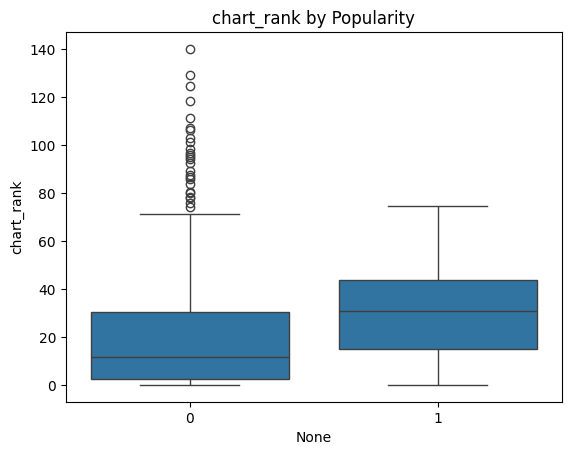

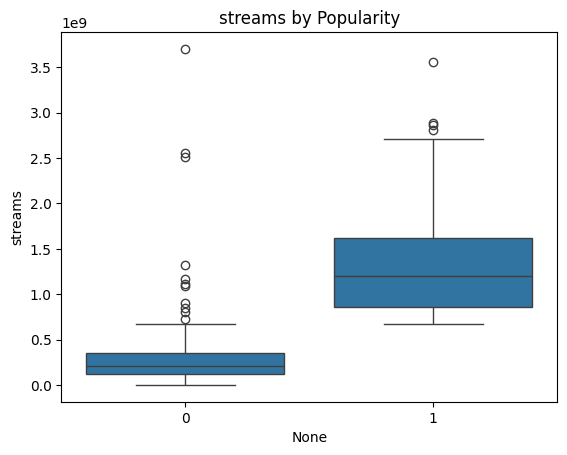

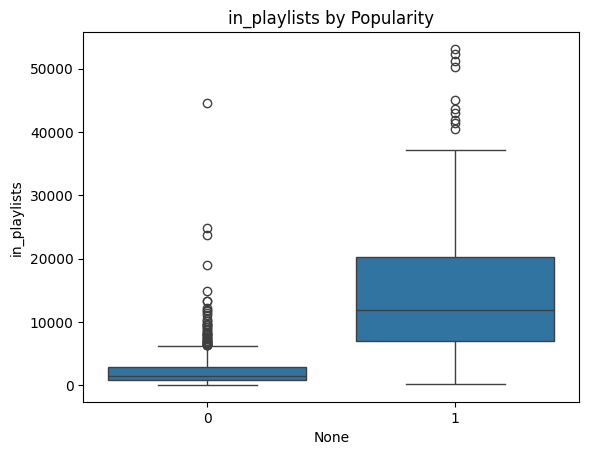

In [ ]:
for col in feature_cols:
    sns.boxplot(x=Y, y=X[col])
    plt.title(f'{col} by Popularity')
    plt.show()

In [ ]:
model_df = songs_df.copy()
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   track_name          952 non-null    object        
 1   artist(s)_name      952 non-null    object        
 2   artist_count        952 non-null    int64         
 3   streams             952 non-null    float64       
 4   bpm                 952 non-null    int64         
 5   mode                952 non-null    object        
 6   danceability_%      952 non-null    int64         
 7   valence_%           952 non-null    int64         
 8   energy_%            952 non-null    int64         
 9   acousticness_%      952 non-null    int64         
 10  instrumentalness_%  952 non-null    int64         
 11  liveness_%          952 non-null    int64         
 12  speechiness_%       952 non-null    int64         
 13  date                952 non-null    datetime64[ns]
 14 

# Insights and Conclusions